In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import sys
from sklearn.preprocessing import StandardScaler # va nous permettre de standardiser les données (déjà la formule)

In [2]:
assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_,_) = fashion_mnist.load_data() 

#images = images [:60000] # on prend les 10 000 premières images
#targets = targets [:60000] # on prend les 10 000 premiers labels

print(images.shape)
print(targets.shape)

(60000, 28, 28)
(60000,)


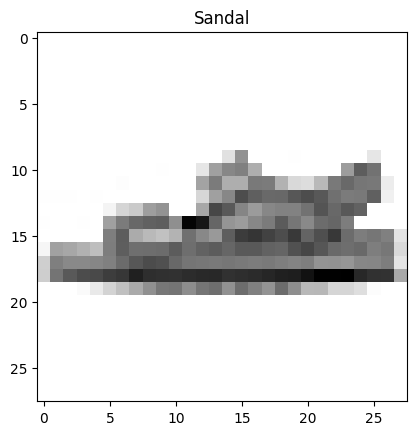

In [4]:
targets_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
# Plot the image
r = np.random.randint(0, 10000)
plt.imshow(images[r], cmap="binary")
plt.title(targets_names[targets[r]])
plt.show()

In [5]:
# Flatten the image afin de l'envoyer dans le réseau de neurones
# On peut flatten en amont de la création du model avec reshape
images = images.reshape(-1, 784)  # -1 permet de garder la première dimension et de laisser numpy déterminer la deuxième
images = images.astype(float) # On s'assure que l'image est constitué uniquement de floatants
scaler = StandardScaler() # Creation d'un objet standardScaler
images = scaler.fit_transform(images) # standardscaler() va standardiser les données autour de 0

#Split the data
from sklearn.model_selection import train_test_split # Peremet de split un dataset
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.2, random_state=1) # Test size est le % de données de test random_state permet de fixer le random

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28])) # Une couche pour Flatten avec entrée 28*28
#print("Shape of the image", images[0:1].shape)
#model_output = model.predict(images[0:1])
#print("Shape of the image after Flatten", model_output.shape)
print(X_train)
print(scaler)
print(X_train.mean())
print(X_train.std())

(48000, 784)
(12000, 784)
(48000,)
(12000,)
[[-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 ...
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]]
StandardScaler()
-0.0011337583448442043
0.9988702075226872


In [6]:
# Ajout des couches
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(250, activation="relu")) # 256 neurones sur la première couche cachée avec fonction d'activation de type relu
model.add(tf.keras.layers.Dense(100, activation="relu"))
#model.add(tf.keras.layers.Dense(100, activation="relu"))
#model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax")) # Couche de sortie avec softmax pour classification transforme les valeurs en probabilités

model_output = model.predict(images[0:1])  # image[0:1] est un tableau de 1 image
print(model_output, targets[0:1])

# Standardiser les données déjà fait plus haut avec StandardScaler
#images = (images - np.mean(images))/np.std(images)

1/1 [==============================] - 1s 651ms/step
[[0.06842949 0.0302503  0.06162081 0.12638342 0.24834692 0.02984392
  0.04131514 0.32588246 0.00921754 0.0587099 ]] [9]


In [7]:
model.summary() # Affiche un résumé du modèle

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               196250    
                                                                 
 dense_1 (Dense)             (None, 100)               25100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 222,360
Trainable params: 222,360
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile the model pour paramétrer le mdl
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"]) # Loss fonction doit être adaptée au type de modèle et de problème

In [9]:
images_test = images[:5] # [:5] permet de prendre 5 images
labels_test = targets[:5]

print(images_test)
print(labels_test)

model_output = model.predict(images_test)
print("output",model_output)

filtred_output = model_output[np.arange(5), labels_test] # Renvoi la probabilité associé au bon label
print("\n Filtred output",filtred_output)

log_filtred_output = np.log(filtred_output)
print("\n Log filtred output",log_filtred_output) # log de la probabilité, vecteur qu'il faut maximiser

print("Mean", np.mean(log_filtred_output))
print("Mean", -np.mean(log_filtred_output)) # Minimiser cette valeur -> ce que fait sparse_categorical_crossentropy
# Sparse -> on peut utiliser le type de labelisation 01234456789 (sortie type softmax), pas besoin de pre-processing
# d'autres en vecteur ex 9 -> [0,0.....,1] = représentation One Hot Encoding

[[-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]
 [-0.00864371 -0.02322333 -0.03917806 ... -0.15681128 -0.08967308
  -0.03414729]]
[9 0 0 3 0]
1/1 [==============================] - 0s 30ms/step
output [[0.06844721 0.03024546 0.06160387 0.12638141 0.24831387 0.0298393
  0.0413441  0.32591975 0.00921032 0.05869477]
 [0.02874141 0.01295506 0.11107664 0.02988028 0.09266309 0.01086327
  0.03677267 0.66139305 0.00916015 0.00649436]
 [0.06146116 0.04513044 0.08943297 0.10073581 0.34744498 0.05908646
  0.04191802 0.16442467 0.0314519  0.05891361]
 [0.10044    0.06416006 0.09826479 0.09278435 0.2906823  0.06479918
  0.0642234  0.11887786 0.06450367 0.0412644 ]
 [0.03798006 0.00812268 0.09079426 0.16912504 0.35945827 0.04913

In [10]:
with tf.device('/GPU:0'): # Utilisation du GPU
    history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size= 50) # On entraine le modèle sur les données d'entrainement et on split 20% des données pour la validation

Epoch 1/10
768/768 [==============================] - 2s 2ms/step - loss: 0.4606 - accuracy: 0.8336 - val_loss: 0.3816 - val_accuracy: 0.8626
Epoch 2/10
768/768 [==============================] - 1s 2ms/step - loss: 0.3381 - accuracy: 0.8745 - val_loss: 0.3605 - val_accuracy: 0.8733
Epoch 3/10
768/768 [==============================] - 1s 2ms/step - loss: 0.2926 - accuracy: 0.8907 - val_loss: 0.3433 - val_accuracy: 0.8783
Epoch 4/10
768/768 [==============================] - 1s 2ms/step - loss: 0.2646 - accuracy: 0.9013 - val_loss: 0.3414 - val_accuracy: 0.8778
Epoch 5/10
768/768 [==============================] - 1s 2ms/step - loss: 0.2431 - accuracy: 0.9078 - val_loss: 0.3428 - val_accuracy: 0.8799
Epoch 6/10
768/768 [==============================] - 1s 2ms/step - loss: 0.2185 - accuracy: 0.9183 - val_loss: 0.3384 - val_accuracy: 0.8848
Epoch 7/10
768/768 [==============================] - 1s 2ms/step - loss: 0.1991 - accuracy: 0.9256 - val_loss: 0.3581 - val_accuracy: 0.8848
Epoch 

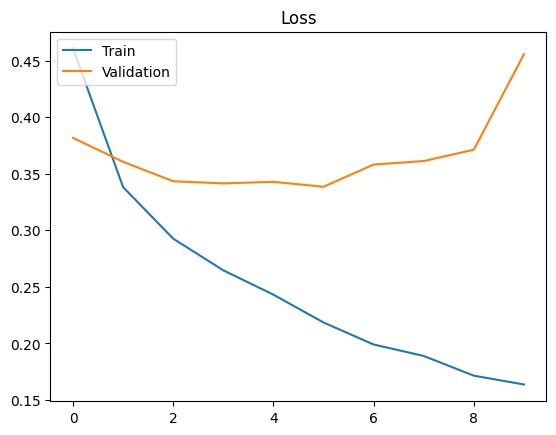

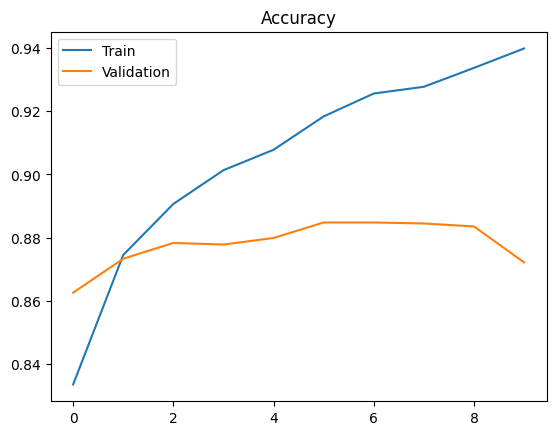

In [11]:
loss_curve = history.history["loss"] # On récupère les valeurs de loss et accuracy pour les données d'entrainement
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"] # On récupère les valeurs de loss et accuracy pour les données de validation
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Validation")
plt.legend(loc="upper left")

plt.title("Loss")
plt.show()

plt.plot(acc_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = "upper left")
plt.title("Accuracy")
plt.show()

On observe qu'au bout de +- 10 epochs on part en overfitting car la courbe de l'entraînement diminue alors que la courbe de validation stagne.

In [12]:
model.evaluate(X_test, y_test)  # Renvoi la loss et l'accuracy
y_pred = model.predict(X_test)
prob_y = y_pred.max(axis = -1)
y_pred = np.argmax(y_pred, axis=1) # Renvoi l'index de la valeur la plus grande
print(y_pred.shape)
accuracy = sum(y_pred == y_test)/len(y_test)
print(f'la précision est de {accuracy *100} %')

375/375 [==============================] - 0s 891us/step
(12000,)
la précision est de 87.41666666666667 %


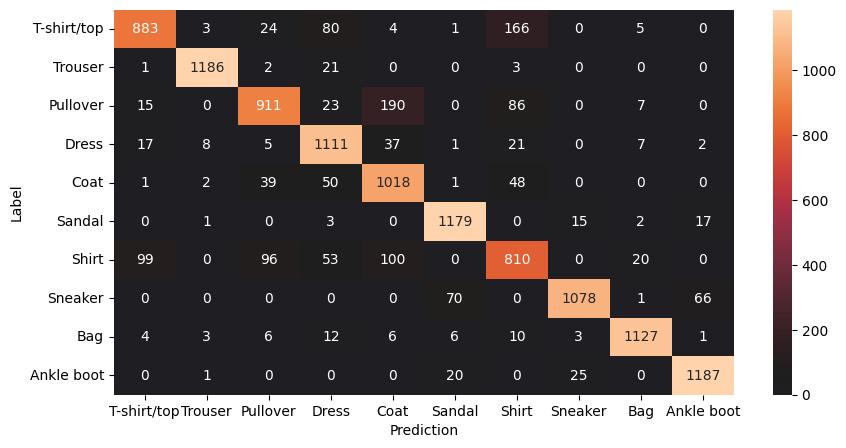

In [13]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt ="d",center = 50, xticklabels=targets_names, yticklabels=targets_names)
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.show()

10496


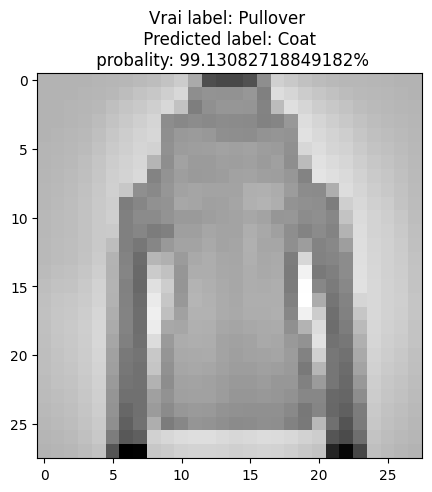

In [14]:
# plot random miss classified examples
misspred = np.where(y_pred != y_test)[0]
misspred = np.reshape(misspred, -1)
i = np.random.choice(misspred)
print (i)
X_test = X_test.reshape(-1, 28, 28)
plt.figure(figsize=(5,5))
plt.imshow(X_test[i], cmap="binary")
plt.title(f"Vrai label: {targets_names[y_test[i]]} \n Predicted label: {targets_names[y_pred[i]]} \n probality: {prob_y[i]*100}%")
plt.show()

In [412]:
h5 = "model.h5" # Sauvegarde du modèle